In [1]:
import pandas as pd 


In [2]:
!kaggle datasets download -d "rjmanoj/credit-card-customer-churn-prediction"

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown




  0%|          | 0.00/262k [00:00<?, ?B/s]
100%|██████████| 262k/262k [00:04<00:00, 64.5kB/s]
100%|██████████| 262k/262k [00:04<00:00, 64.5kB/s]


In [4]:
import zipfile

In [6]:

path = "credit-card-customer-churn-prediction.zip"
with zipfile.ZipFile(path,"r") as ref_file:
    file = ref_file.extractall("")


In [14]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df = pd.get_dummies(df,columns = ["Geography","Gender"],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
X=df.drop(columns =["Exited"])
y= df["Exited"]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [25]:
model = keras.Sequential()

In [48]:
model.add(Dense(8,input_dim =11,activation = "sigmoid"))
model.add(Dense(8,activation = "sigmoid"))
model.add(Dense(1,activation = "sigmoid"))

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219 (880.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [50]:
model.compile(loss = "binary_crossentropy",optimizer = "Adam",metrics =["accuracy"])

In [51]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5035 - loss: 0.6844 - val_accuracy: 0.7987 - val_loss: 0.5116
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7939 - loss: 0.5109 - val_accuracy: 0.7987 - val_loss: 0.4974
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.5113 - val_accuracy: 0.7987 - val_loss: 0.4929
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7960 - loss: 0.4957 - val_accuracy: 0.7987 - val_loss: 0.4884
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7917 - loss: 0.4963 - val_accuracy: 0.7987 - val_loss: 0.4831
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.7914 - loss: 0.4913 - val_accuracy: 0.7987 - val_loss: 0.4762
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4748 - val_accuracy: 0.7987 - val_loss: 0.4673
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4656 - 

In [52]:
pred_vals =model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [53]:
pred_vals

array([[0.20027187],
       [0.11260109],
       [0.46274573],
       ...,
       [0.7038965 ],
       [0.06482119],
       [0.20707318]], dtype=float32)

In [54]:
import numpy as np 
preds=np.where(pred_vals>0.5,1,0)
preds

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [55]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,preds)
score

0.842

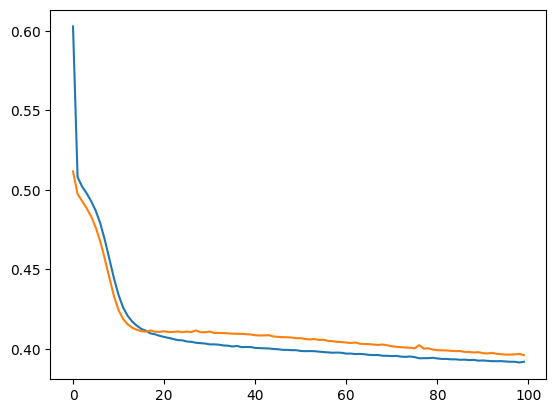

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


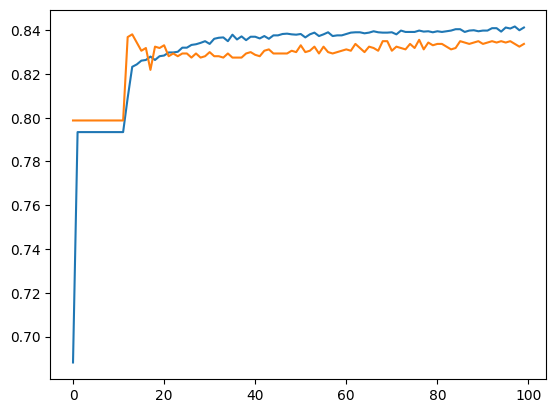

In [57]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])